In this notebook you will learn how to work with medical image data stored in the NIfTI format. NIFTI = Neuroimaging Informatics Technology Initiative.

We will take a look at the nibabel python package which allows handling NIfTI files.

In a first step, we will convert the DICOM data from the previous session to the NIfTI format and continue from there.

## DICOM to NIfTI conversion
It can be very useful to concert DICOM files to the NIftI format before further processing as NIfTI files are easier to handle. There are many tools, we will use dicom2nifti:

In [17]:
import dicom2nifti
from pathlib import Path


In order to demonstrate DICOM to NIfTI conversion we will use the DICOM data set downloaded in the last lecture on  DICOM data.

In [18]:
path_to_dicom = "SE000001"

## To make this work I had to edit files in /opt/anaconda3/envs/pytorchenvAImed/lib/python3.10/site-packages/dicom2nifti/

### common.py    $ replace compressed_dicom.read_file with compressed_dicom.dcmread
### convert_dicom.py   $ replace compressed_dicom.read_file with compressed_dicom.dcmread
### compressed_dicom.py   (replace read_file - with dcmread both in def read_file ... , and pydicom.read_file)



In [19]:
dicom2nifti.convert_directory(path_to_dicom, ".")

You will now find the file *201_t2w_tse.nii.gz* in the *path_to_nifti* (have a look)

## Read NIfTI files

Now, we proceed to the process of reading and exploring NIfTI files

First we import the necessary packages

## Imports

* nibabel to handle nifti files
* matplotlib to plot the brain images 

In [20]:
import nibabel as nib
import matplotlib.pyplot as plt


This single NIfTI file created above contains the complete 3D mri scan! <br />
We can load it by using *nib.load(path)*

In [21]:
nifti = nib.load('201_t2w_tse.nii.gz')

You can print this object in order to look at metadata including the NIftI **header** information:

In [22]:
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      

You can access single header entries in the following simple way:

You can access single metadata entries as follows:

In [23]:
nifti.header["qoffset_x"]

array(115.27232, dtype=float32)

In [24]:
print(nifti.shape) # get the image shape
print(nifti.header.get_data_shape()) # get the image shape in a different way

(256, 256, 27)
(256, 256, 27)


Obtaining image **pixel data**:

The image pixel data can be extracted using the *get_fdata()* function of the nifti object.

In [25]:
image_array = nifti.get_fdata()
print(image_array.dtype, image_array.shape)


float64 (256, 256, 27)


We can finally take a look at the brain scan. <br />

Don't forget to pass cmap="gray" to imshow, otherwise your image will look quite odd

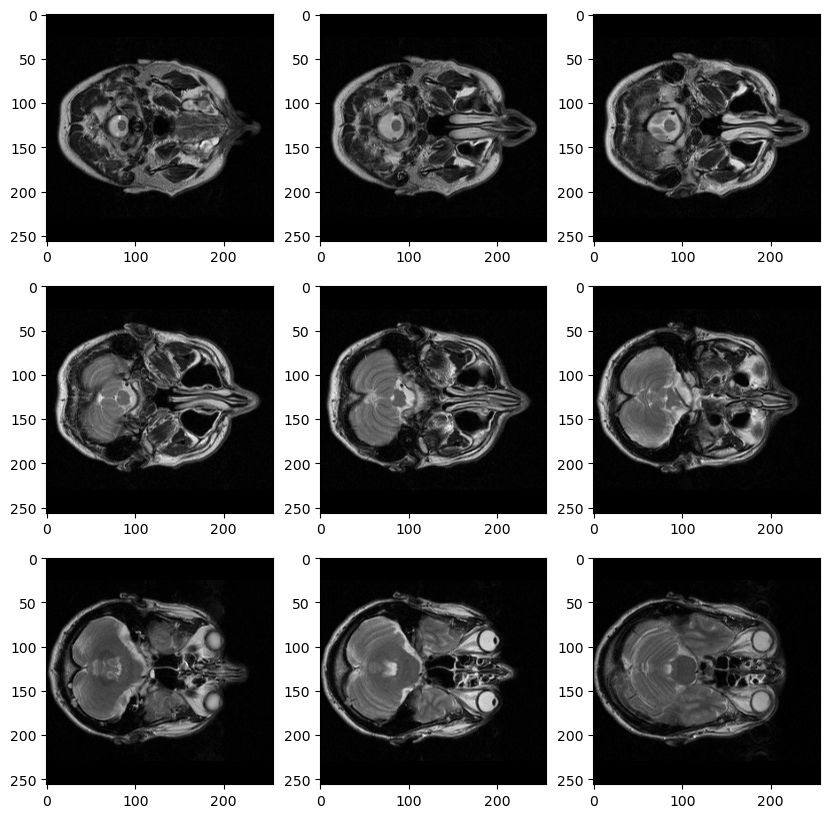

In [26]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(image_array[:,:,slice_counter], cmap="gray")
        slice_counter+=1

### Write NIfTI files
Manytimes, you will obtain image data as the results of an algorithm or processing step that you want to store in the NIfTI format. This can be easily done using NiBabel. As an example, We use the 3D image array from above, perform a simple processing step and save it as a new NIfTI file.

In [11]:
# Here we apply a very simple threshold and set all image voxels to 0 that have a value smaller than 300
image_array_processed = image_array * (image_array>300)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

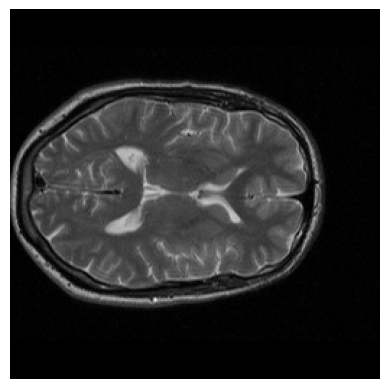

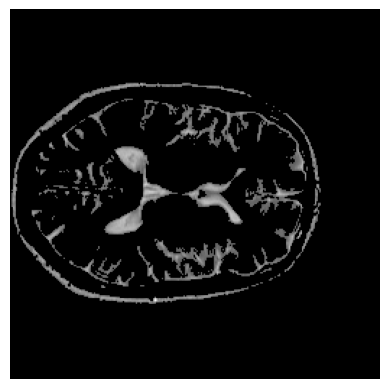

In [14]:
# Now let us look at the results of this processing step (we just plot slice number 13) 
plt.figure()
plt.imshow(image_array[:,:,13],cmap="gray") # plot the original image
plt.axis("off")

plt.figure()
plt.imshow(image_array_processed[:,:,13],cmap="gray") # plot the processed image
plt.axis("off")

First we convert the processed image array back to a nifti object. To this end we use the numpy array of the processed image and header information about the image geometry (affine matrix) from the original NIftI file:

In [15]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)

We can now save the processed image using the save function in NiBabel:

In [16]:
nib.save(processed_nifti, '201_t2w_tse_processed.nii.gz')

Congratulations! You made it!